In [1]:
import sys
sys.path.append("../")

In [2]:
from models.transcliprestorater import TransCLIPRestorater
from transformation.transforms import get_transform_v3
from PIL import Image
import torch

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
model_trans = TransCLIPRestorater(
    img_size=(3,3,512,512), 
    patch_size=32, 
    token_len=512, 
    embed_dim=512, 
    num_heads=8, 
    num_layers=6
)

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
transform = get_transform_v3()

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
def read_img(path:str):
    img_pil = Image.open(path)
    img = img_pil.resize((512,512))

    img = transform(img)
    return img.unsqueeze(0)

imgs = []
for path_ in ["./sample.jpg","./sample2.jpg","./sample3.jpg"]:
    b = read_img(path_)
    imgs.append(b)

imgs = torch.concat(imgs)
imgs = imgs.cuda()

In [6]:
model_trans = model_trans.cuda()

In [7]:
saida = model_trans(imgs)

In [10]:
saida = saida.cpu()

In [ ]:
model_trans.

In [20]:
from models.tokenization import UnPatchTokenization
import numpy as np
import matplotlib.pyplot as plt

In [17]:
un_patch = UnPatchTokenization(32,512)

In [18]:
denoised = un_patch(saida)
denoised = np.transpose(denoised.detach(),(0,2,3,1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-17.334526..15.377515].


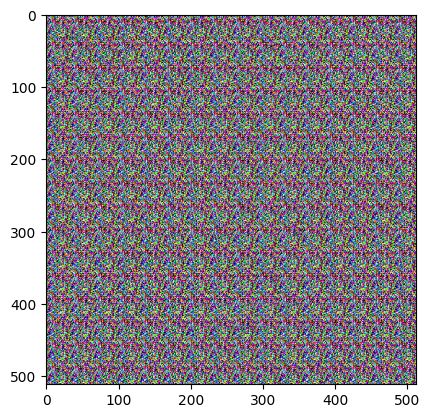

In [21]:
plt.imshow(denoised[0].numpy())

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from util import get_sinusoid_encoding
from models.tokenization import PatchTokenizationEinops

from transformation.transforms import get_transform_v3
from PIL import Image

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [54]:
model_trans = VisionModelTransformerTorchV2(img_size=(3,3,512,512), patch_size=32, token_len=512, embed_dim=512, num_heads=8, num_layers=6)

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [55]:
transform = get_transform_v3()

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [78]:
from PIL import Image

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [57]:
def read_img(path:str):
    img_pil = Image.open(path)
    img = img_pil.resize((512,512))

    img = transform(img)
    return img_pil, img.unsqueeze(0)

imgs = []
pil_imgs = []
for path_ in ["./sample.jpg","./sample2.jpg","./sample3.jpg"]:
    a,b = read_img(path_)
    pil_imgs.append(a)
    imgs.append(b)

imgs = torch.concat(imgs)

In [58]:
imgs.shape

torch.Size([3, 3, 512, 512])

In [75]:
model = model.eval()

In [77]:
model = model.cuda()

In [82]:
imgs.shape

torch.Size([3, 3, 512, 512])

In [95]:
model.get_image_features(**processor(images=imgs,do_rescale=False,return_tensors="pt",padding=True))

torch.Size([3, 512])

In [79]:
imgs_features = torch.concat([model.get_image_features(**processor(images=x, return_tensors="pt", padding=True)) for x in pil_imgs])
imgs_features = imgs_features.unsqueeze(1)

In [67]:
model_mine = nn.Sequential(
    nn.Conv1d(1, 256, 1),
    nn.GELU()
)

In [70]:
imgs_features.shape

torch.Size([3, 1, 512])

In [73]:
model_mine(imgs_features).shape

torch.Size([3, 256, 512])

In [63]:
image_token = model_trans.patch_tokenization(imgs)

In [64]:
image_token.shape

torch.Size([3, 256, 512])

In [13]:
out = image_token + imgs_features

In [14]:
out.shape

torch.Size([3, 256, 512])

In [72]:
model_trans(imgs).shape

torch.Size([3, 256, 3072])

In [22]:
output = model(img)

In [23]:
output.shape

torch.Size([1, 256, 588])

In [24]:
from models.tokenization import UnPatchTokenizationEinops

In [25]:
un_patch = UnPatchTokenizationEinops(14,224)

In [42]:
denoised = un_patch(output)
denoised = np.transpose(denoised.detach(),(0,2,3,1))

In [50]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12.7368965..12.913419].


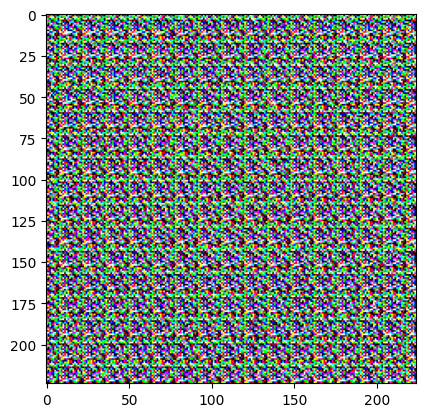

In [51]:
plt.imshow(denoised[0].numpy())